In [1]:
#Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Loading the dataset “featured_telcom_data.xlsx”:

In [3]:
featured_data=pd.read_excel(r"C:\Users\HP\Desktop\Digi-crome\Project-5\Data\featured_telcom_data.xlsx")

In [4]:
featured_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,...,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06
149998,13114483573367300096,2019-04-29 07:28:43,283,2019-04-30 10:46:12,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07
149999,13114483573367300096,2019-04-29 07:28:43,696,2019-04-30 10:40:34,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06


In [5]:
featured_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,...,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0


In [6]:
featured_data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06
149998,13114483573367300096,2019-04-29 07:28:43,283,2019-04-30 10:46:12,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07
149999,13114483573367300096,2019-04-29 07:28:43,696,2019-04-30 10:40:34,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06
150000,,2019-04-29 07:08:38,499,2019-04-25 00:01:32,500,86399,208201546329113,33663706799,35722009426311,Unknown,...,1.791729e+06,467373.44194,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06


In [7]:
featured_data.shape

(150001, 70)

# Calculate average TCP retransmission, RTT, and throughput:

In [8]:
featured_data['Avg TCP Retrans. Vol (Bytes)'] = (featured_data['TCP DL Retrans. Vol (Bytes)'] +
                                      featured_data['TCP UL Retrans. Vol (Bytes)']) / 2

In [9]:
featured_data['Avg TCP Retrans. Vol (Bytes)']

0         294839.75
1         294839.75
2         294839.75
3         294839.75
4         294839.75
            ...    
149996    294839.75
149997    294839.75
149998    294839.75
149999    294839.75
150000    294839.75
Name: Avg TCP Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [10]:
featured_data['Avg RTT (ms)'] = (featured_data['Avg RTT DL (ms)'] + featured_data['Avg RTT UL (ms)']) / 2

In [11]:
featured_data['Avg RTT (ms)']

0         23.5
1         35.0
2         25.0
3         25.0
4         25.0
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000    25.0
Name: Avg RTT (ms), Length: 150001, dtype: float64

In [12]:
featured_data['Avg Throughput (kbps)'] = (featured_data['Avg Bearer TP DL (kbps)'] + featured_data['Avg Bearer TP UL (kbps)']) / 2

In [13]:
featured_data['Avg Throughput (kbps)']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000    63.0
Name: Avg Throughput (kbps), Length: 150001, dtype: float64

# ◆ Select relevant features for clustering:

In [14]:
features = featured_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

# Standardize the data:

In [15]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering for Engagement:

In [16]:
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(features_scaled)
featured_data['Engagement Cluster'] = engagement_clusters

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Perform k-means clustering for Experience:

In [17]:
kmeans_experience = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_experience.fit_predict(features_scaled)
featured_data['Experience Cluster'] = experience_clusters

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Calculate the Euclidean distance for Engagement score:

In [18]:
less_engaged_centroid = kmeans_engagement.cluster_centers_[0]
featured_data['Engagement Score'] = cdist(features_scaled, [less_engaged_centroid], metric='euclidean')

In [19]:
featured_data['Engagement Score']

0         0.196168
1         0.175220
2         0.194544
3         0.192352
4         0.194544
            ...   
149996    0.212012
149997    0.216762
149998    0.193348
149999    0.201561
150000    0.191217
Name: Engagement Score, Length: 150001, dtype: float64

# Calculate the Euclidean distance for Experience score:

In [20]:
worst_experience_centroid = kmeans_experience.cluster_centers_[2]
featured_data['Experience Score'] = cdist(features_scaled, [worst_experience_centroid], metric='euclidean')

In [21]:
featured_data['Experience Score']

0         22.346687
1         22.346503
2         22.346875
3         22.346551
4         22.346875
            ...    
149996    22.346697
149997    22.346925
149998    22.346556
149999    22.346743
150000    22.346382
Name: Experience Score, Length: 150001, dtype: float64

# Calculate the satisfaction score as the average of Engagement & Experience scores:

In [22]:
featured_data['Satisfaction Score'] = (featured_data['Engagement Score'] + featured_data['Experience Score']) / 2

In [23]:
featured_data['Satisfaction Score']

0         11.271427
1         11.260862
2         11.270709
3         11.269452
4         11.270709
            ...    
149996    11.279355
149997    11.281843
149998    11.269952
149999    11.274152
150000    11.268799
Name: Satisfaction Score, Length: 150001, dtype: float64

# Report the top 10 satisfied Customers:

In [24]:
top_10_satisfied_customers = featured_data.nsmallest(10, 'Satisfaction Score')

# ◆ Show the top 10 satisfied customers:

In [25]:
print(top_10_satisfied_customers[['Engagement Score', 'Experience Score', 'Satisfaction Score']])

        Engagement Score  Experience Score  Satisfaction Score
83562          10.846401         11.472356           11.159379
45691           9.673159         12.645617           11.159388
135980          1.286370         21.032415           11.159392
44369           0.609105         21.709703           11.159404
37953           0.234574         22.084264           11.159419
137253          0.023036         22.295867           11.159452
96042           0.387443         21.931535           11.159489
2810           10.239941         12.079049           11.159495
34529           0.156277         22.162973           11.159625
15839           0.456079         21.863191           11.159635


# ◆ Preparation of Data:

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# • Prepare the features and target:

In [27]:
X = np.asanyarray(featured_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])
y = np.asanyarray(featured_data['Satisfaction Score'])

In [28]:
X.shape

(150001, 3)

In [29]:
y.shape

(150001,)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ◆ Initialize and train the linear_regression_model:

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
r2_score = r2_score(y_test, y_pred)

In [33]:
r2_score

0.9066361669597846

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [35]:
mae

0.12303205004189263

In [36]:
mse

0.07216062127840765

In [37]:
rmse

0.26862729064338875

In [38]:
import pickle 
pickle.dump(model,open('regression_model.pkl','wb'))
print(type(model)) 

<class 'sklearn.linear_model._base.LinearRegression'>


# Extract the Engagement and Experience scores:

In [39]:
scores = featured_data[['Engagement Score', 'Experience Score']]

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42)
featured_data['Score Cluster'] = kmeans.fit_predict(scores)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
centroids = kmeans.cluster_centers_

In [42]:
centroids

array([[ 0.68828002, 22.28129064],
       [22.86825532, 13.58390469]])

# Visualization of the clusters:

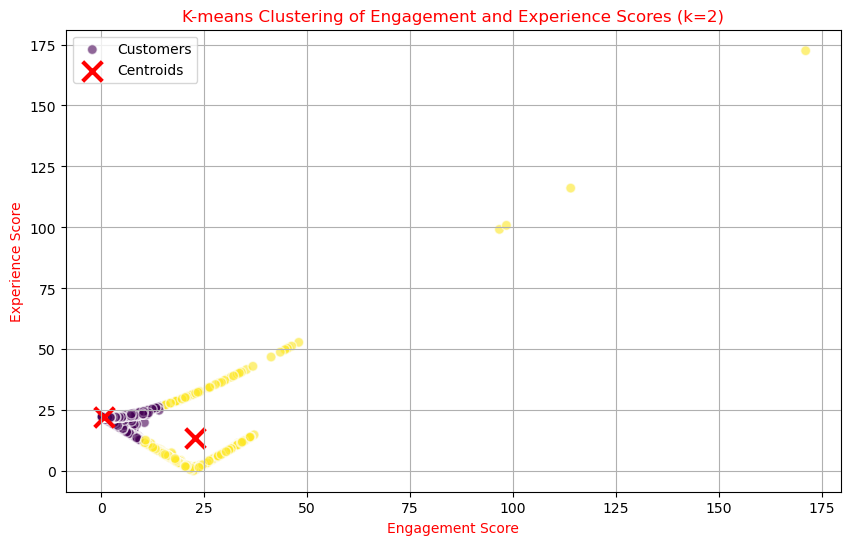

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(featured_data['Engagement Score'], featured_data['Experience Score'], c=featured_data['Score Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='w', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering of Engagement and Experience Scores (k=2)', color='red')
plt.xlabel('Engagement Score', color='red')
plt.ylabel('Experience Score', color='red')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
print(pd.DataFrame(centroids, columns=['Engagement Score', 'Experience Score']))

   Engagement Score  Experience Score
0          0.688280         22.281291
1         22.868255         13.583905


# Aggregate the average satisfaction and experience score per cluster:

In [45]:
featured_data['Satisfaction Score'] = (featured_data['Engagement Score'] + featured_data['Experience Score']) / 2

In [46]:
cluster_aggregation = featured_data.groupby('Score Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

In [47]:
cluster_aggregation

,Score Cluster,Satisfaction Score,Experience Score
0,0,11.484785,22.281291
1,1,18.226080,13.583905


In [48]:
Mysql_Data=pd.DataFrame(featured_data,columns=['Bearer Id','Engagement Score', 'Experience Score','Satisfaction Score'])

In [49]:
Mysql_Data.sample(5)

,Bearer Id,Engagement Score,Experience Score,Satisfaction Score
22762,7277825656075780096,0.713558,22.265387,11.489472
55105,7349883252217910272,0.215806,22.346765,11.281285
119482,7277825667139229696,1.152179,22.185926,11.669052
130365,7349883261931839488,0.216895,22.346947,11.281921
42875,13114483554835400704,0.192143,22.346520,11.269331


In [50]:
Mysql_Data.isnull().sum()

Bearer Id             0
Engagement Score      0
Experience Score      0
Satisfaction Score    0
dtype: int64

# ◆ Connect with Mysql database:

In [51]:
from pandas.io import sql
import mysql.connector
import pymysql
import MySQLdb
from sqlalchemy import create_engine

In [52]:
# Database credentials and connection
db_username = 'root'
db_password = '8686'
db_host = 'localhost'
db_port = 3306
db_name = 'telecom_project'

In [53]:
engine = create_engine(f"mysql+mysqlconnector://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}")

In [54]:
Mysql_Data.to_sql(name='final_telecom_table', con=engine, if_exists='replace', index=False)

150001

In [55]:
query = "SELECT * FROM final_telecom_table LIMIT 10;"
data_from_db = pd.read_sql(query, con=engine)
print(data_from_db)

              Bearer Id  Engagement Score  Experience Score  \
0  13114483460844900352          0.196168         22.346687   
1  13114483482878900224          0.175220         22.346503   
2  13114483484080500736          0.194544         22.346875   
3  13114483485442799616          0.192352         22.346551   
4  13114483499480700928          0.194544         22.346875   
5  13114483499779198976          0.191277         22.346391   
6  13114483501243799552          0.156342         22.346103   
7  13042425910865399808          0.102993         22.333657   
8  13114483506432499712          0.192143         22.346520   
9  13042425914669299712          0.083317         22.297112   

   Satisfaction Score  
0           11.271427  
1           11.260862  
2           11.270709  
3           11.269452  
4           11.270709  
5           11.268834  
6           11.251222  
7           11.218325  
8           11.269331  
9           11.190215  


In [56]:
Mysql_Data.to_csv(r"C:\Users\HP\Desktop\Digi-crome\Project-5\Data\Final_telecom_Data.csv",index=False)